### Loading Data & Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sales (1).csv')
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,11/18/2021,Northeast,Maine,Portland,Men's Apparel,$65.00,150,"9,750","$2,438",Outlet
9637,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Women's Athletic Footwear,$65.00,150,"9,750","$2,438",Outlet
9638,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Men's Apparel,$75.00,150,"11,250","$2,813",Outlet
9639,West Gear,1185732,4/10/2021,Midwest,Indiana,Indianapolis,Men's Apparel,$65.00,150,"9,750","$2,925",In-store


### Dataset Explanation



•	Retailer: Represents the business or individual that sells Adidas products directly to consumers.

•	Retailer ID: A unique identifier assigned to each retailer in the dataset.

•	Invoice Date: The date when a particular invoice or sales transaction took place.

•	Region: Refers to a specific geographical area or district where the sales activity or retail operations occur.

•	State: Represents a specific administrative division or territory within a country.

•	City: Refers to an urban area or municipality where the sales activity or retail operations are conducted.

•	Product: Represents the classification or grouping of Adidas products.

•	Price per Unit: The cost or price associated with a single unit of a product.

•	Units Sold: The quantity or number of units of a particular product sold during a specific sales transaction.

•	Total Sales: The overall revenue generated from the sales transactions.

•	Operating Profit: The profit earned by the retailer from its normal business operations.

•	Sales Method: The approach or channel used by the retailer to sell its products or services.

### Show sample of data

In [ ]:
data.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet


In [ ]:
data.shape

(9641, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


In [ ]:
data.isna().sum() / data.shape[0]

Retailer            0.000000
Retailer ID         0.000000
Invoice Date        0.000000
Region              0.000000
State               0.000000
City                0.000000
Product             0.000000
Price per Unit      0.000207
Units Sold          0.000000
Total Sales         0.000000
Operating Profit    0.000000
Sales Method        0.000000
dtype: float64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe(include = object)

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
count,9641,9641,9641,9641,9641,9641,9639,9641,9641,9641,9641
unique,6,724,5,50,52,7,94,361,1710,1530,3
top,Foot Locker,1/17/2021,West,California,Portland,Men's Street Footwear,$50.00,225,"10,000","$6,300",Online
freq,2634,77,2446,430,360,1610,674,207,66,39,4889


In [ ]:
# set style of visualization

sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [ ]:
# drop column have missing value in Price per units columns

data.dropna(subset = "Price per Unit", inplace = True)

In [ ]:
data.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64

### Discover `Retailer` column

In [ ]:
data['Retailer'].unique()

array(['Walmart', 'West Gear', 'Sports Direct', 'Foot Locker', 'Amazon',
       "Kohl's"], dtype=object)

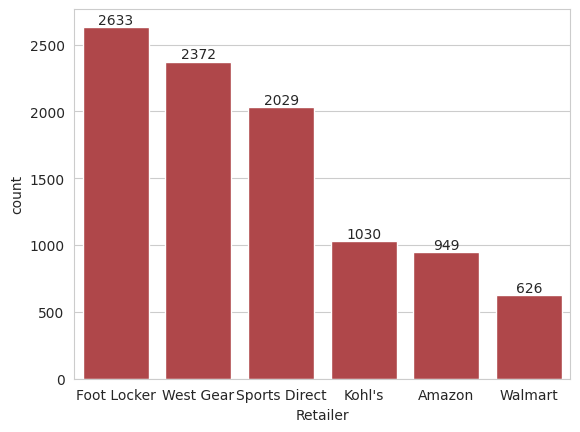

In [ ]:
graph = sns.countplot(x = "Retailer", data = data, order = data.Retailer.value_counts().index)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

### Discover `Invoice Date` column

In [ ]:
data["Invoice Date"].unique()[:50]

array(['6/17/2021', '7/16/2021', '8/25/2021', '8/27/2021', '8/21/2021',
       '1/11/2021', '11/17/2021', '1/23/2021', '4/3/2021', '3/10/2020',
       '1/18/2021', '2/11/2021', '6/11/2021', '4/10/2021', '3/16/2021',
       '9/16/2021', '2/21/2021', '10/21/2021', '5/3/2020', '4/19/2020',
       '4/27/2020', '3/10/2021', '10/11/2021', '11/11/2021', '3/4/2020',
       '1/25/2020', '1/7/2020', '1/1/2020', '2/7/2021', '8/22/2021',
       '2/18/2021', '8/11/2021', '4/17/2021', '11/20/2021', '3/16/2020',
       '8/26/2020', '9/1/2020', '1/31/2020', '2/6/2020', '3/17/2020',
       '4/18/2020', '3/15/2020', '3/17/2021', '6/18/2021', '10/18/2021',
       '11/18/2021', '5/12/2021', '9/12/2021', '3/19/2021', '9/19/2021'],
      dtype=object)

In [ ]:
# convert data type to date time

data['Invoice Date'] = pd.to_datetime(data['Invoice Date'])
data['Invoice Date']

0      2021-06-17
1      2021-07-16
2      2021-08-25
3      2021-08-27
4      2021-08-21
          ...    
9636   2021-11-18
9637   2021-10-22
9638   2021-10-22
9639   2021-04-10
9640   2021-10-05
Name: Invoice Date, Length: 9639, dtype: datetime64[ns]

In [ ]:
# extract month

data['Month'] = data['Invoice Date'].dt.month
data['Month']

0        6
1        7
2        8
3        8
4        8
        ..
9636    11
9637    10
9638    10
9639     4
9640    10
Name: Month, Length: 9639, dtype: int32

In [ ]:
# extract year

data['Year'] = data['Invoice Date'].dt.year
data['Year']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
9636    2021
9637    2021
9638    2021
9639    2021
9640    2021
Name: Year, Length: 9639, dtype: int32

In [ ]:
# extract day

data['Day'] = data['Invoice Date'].dt.day
data['Day']

0       17
1       16
2       25
3       27
4       21
        ..
9636    18
9637    22
9638    22
9639    10
9640     5
Name: Day, Length: 9639, dtype: int32

In [ ]:
# create season column

def find_seasons(monthNumber):
    if monthNumber in [12, 1, 2]:
        return 'Winter'

    elif monthNumber in [3, 4, 5]:
        return 'Spring'

    elif monthNumber in [6, 7, 8]:
        return 'Summer'

    elif monthNumber in [9, 10, 11]:
        return 'Autumn'

data['Season'] = data['Month'].apply(find_seasons)
data['Season']

0       Summer
1       Summer
2       Summer
3       Summer
4       Summer
         ...  
9636    Autumn
9637    Autumn
9638    Autumn
9639    Spring
9640    Autumn
Name: Season, Length: 9639, dtype: object

In [ ]:
# convert mont column to month name

data['Month'] = pd.to_datetime(data['Month'], format='%m').dt.month_name()

In [ ]:
# drop Invoice Date, Retailer ID columns

data.drop(columns = ['Retailer ID', 'Invoice Date'], inplace = True)

In [ ]:
data.sample(2)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
6633,West Gear,Northeast,New York,Albany,Men's Street Footwear,$65.00,950,"61,750","$27,788",In-store,July,2021,8,Summer
1489,Foot Locker,West,Arizona,Phoenix,Men's Athletic Footwear,$46.00,190,874,$367,Outlet,August,2021,23,Summer


In [ ]:
# convert some column datatype

data["Day"] = data['Day'].astype('category')
# -----------------
data['Season'] = data['Season'].astype('category')
# -----------------
data['Year'] = data['Year'].astype('category')

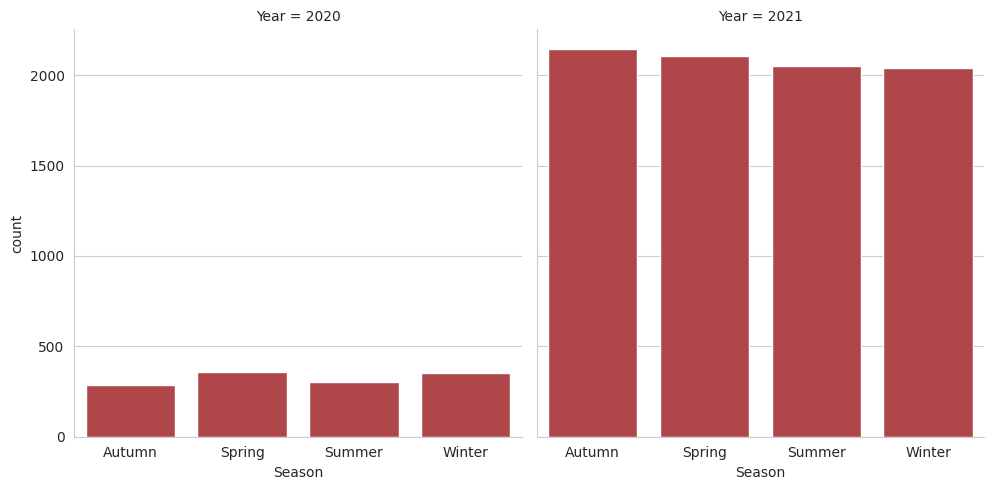

In [ ]:
graph = sns.catplot(x = "Season", col = "Year", data = data, kind = "count")
plt.show()

### Discover `Region` column

In [ ]:
data['Region'].unique()

array(['Southeast', 'South', 'Midwest', 'Northeast', 'West'], dtype=object)

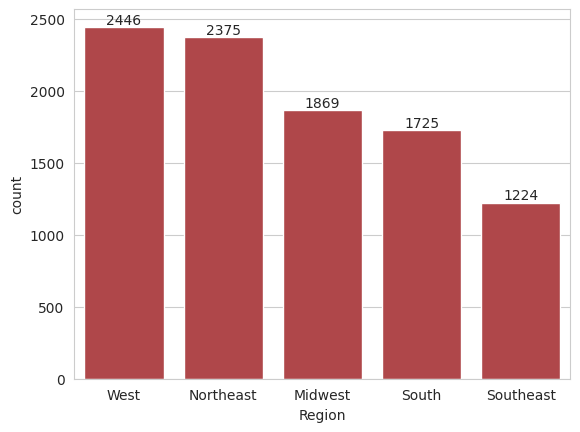

In [ ]:
graph = sns.countplot(x = "Region", data = data, order = data.Region.value_counts().index)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

### Discover `State` column

In [ ]:
data['State'].unique()

array(['Florida', 'Louisiana', 'Alabama', 'Missouri', 'Mississippi',
       'Wisconsin', 'New York', 'Michigan', 'Utah', 'Ohio', 'Arkansas',
       'Georgia', 'Texas', 'Oklahoma', 'West Virginia', 'California',
       'South Carolina', 'Kansas', 'Tennessee', 'North Carolina', 'Idaho',
       'Indiana', 'New Jersey', 'Oregon', 'South Dakota', 'North Dakota',
       'Iowa', 'Maryland', 'Delaware', 'Washington', 'Virginia',
       'Wyoming', 'Minnesota', 'Kentucky', 'Connecticut', 'Rhode Island',
       'Massachusetts', 'New Mexico', 'Nevada', 'Illinois', 'Nebraska',
       'Maine', 'Arizona', 'Vermont', 'New Hampshire', 'Hawaii',
       'Montana', 'Colorado', 'Pennsylvania', 'Alaska'], dtype=object)

In [ ]:
data['State'].nunique()

50

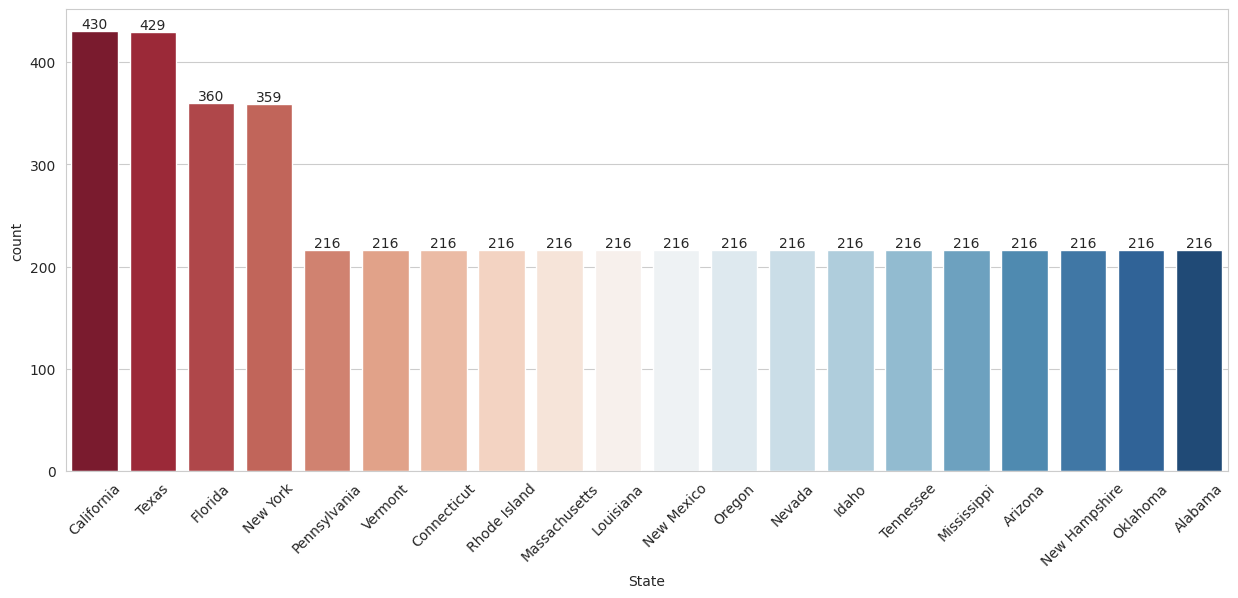

In [ ]:
plt.figure(figsize = (15,6))
graph = sns.countplot(x = "State", data = data, order = data.State.value_counts()[:20].index, palette = "RdBu")
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.show()

### Discover `City` column

In [ ]:
data['City'].unique()

array(['Orlando', 'New Orleans', 'Birmingham', 'St. Louis', 'Jackson',
       'Milwaukee', 'New York', 'Detroit', 'Salt Lake City', 'Columbus',
       'Little Rock', 'Atlanta', 'Houston', 'Oklahoma City', 'Charleston',
       'San Francisco', 'Dallas', 'Wichita', 'Miami', 'Knoxville',
       'Los Angeles', 'Charlotte', 'Boise', 'Indianapolis', 'Newark',
       'Portland', 'Sioux Falls', 'Fargo', 'Des Moines', 'Baltimore',
       'Wilmington', 'Seattle', 'Richmond', 'Albany', 'Cheyenne',
       'Minneapolis', 'Louisville', 'Hartford', 'Providence', 'Boston',
       'Albuquerque', 'Las Vegas', 'Chicago', 'Omaha', 'Phoenix',
       'Burlington', 'Manchester', 'Honolulu', 'Billings', 'Denver',
       'Philadelphia', 'Anchorage'], dtype=object)

In [ ]:
data['City'].nunique()

52

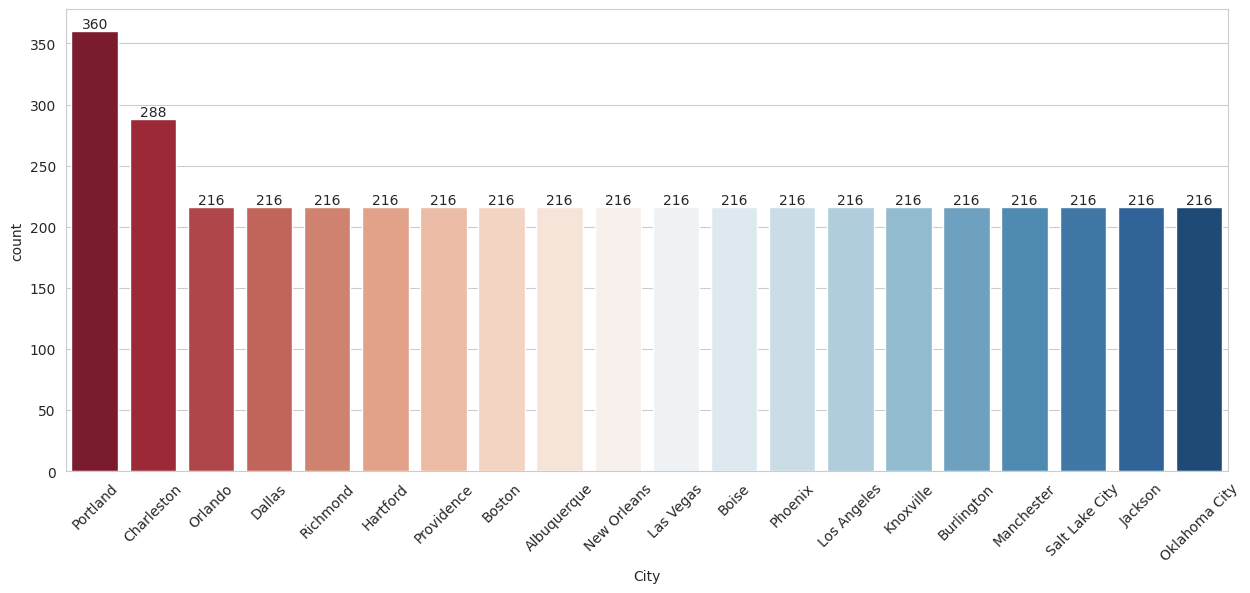

In [ ]:
plt.figure(figsize = (15,6))
graph = sns.countplot(x = "City", data = data, order = data.City.value_counts()[:20].index, palette = "RdBu")
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.show()

### Discover ` Product` column

In [ ]:
print(data['Product'].nunique())
print('-' * 20)
print(data['Product'].unique())

7
--------------------
["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Men's aparel"]


In [ ]:
# replace replace <Men's aparel> with <Men's Apparel>

data['Product'] = data['Product'].replace("Men's aparel", "Men's Apparel")

In [ ]:
print(data['Product'].nunique())
print('-' * 20)
print(data['Product'].unique())

6
--------------------
["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"]


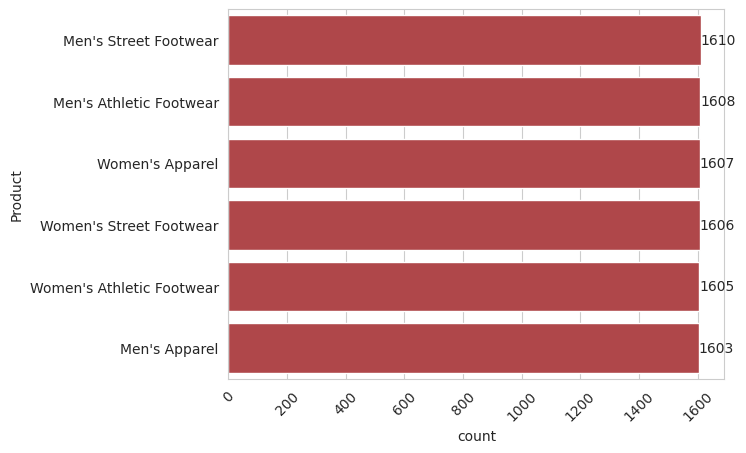

In [ ]:

graph = sns.countplot(y = "Product", data = data, order = data.Product.value_counts()[:20].index)
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.show()

 ⚠️  `We may need to modify the data to equivalent values, such as “Men’s Street Footwear” and “Men’s Athletic Footwear” but after knowing the price for each of them.`

### Discover `Price per Unit` column

In [ ]:
data['Price per Unit'].unique()

array(['$103.00 ', '$10.00 ', '$15.00 ', '$20.00 ', '$44.00 ', '$48.00 ',
       '$39.00 ', '$46.00 ', '$47.00 ', '$40.00 ', '$33.00 ', '$34.00 ',
       '$31.00 ', '$41.00 ', '$29.00 ', '$56.00 ', '$37.00 ', '$25.00 ',
       '$32.00 ', '$36.00 ', '$43.00 ', '$45.00 ', '$38.00 ', '$26.00 ',
       '$42.00 ', '$35.00 ', '$50.00 ', '$62.00 ', '$58.00 ', '$63.00 ',
       '$53.00 ', '$30.00 ', '$59.00 ', '$54.00 ', '$28.00 ', '$24.00 ',
       '$27.00 ', '$55.00 ', '$61.00 ', '$23.00 ', '$60.00 ', '$64.00 ',
       '$51.00 ', '$52.00 ', '$68.00 ', '$67.00 ', '$86.00 ', '$66.00 ',
       '$49.00 ', '$74.00 ', '$83.00 ', '$69.00 ', '$57.00 ', '$79.00 ',
       '$73.00 ', '$65.00 ', '$22.00 ', '$80.00 ', '$21.00 ', '$12.00 ',
       '$77.00 ', '$72.00 ', '$76.00 ', '$13.00 ', '$70.00 ', '$82.00 ',
       '$19.00 ', '$88.00 ', '$7.00 ', '$14.00 ', '$71.00 ', '$16.00 ',
       '$17.00 ', '$87.00 ', '$18.00 ', '$81.00 ', '$78.00 ', '$9.00 ',
       '$92.00 ', '$85.00 ', '$90.00 ', '$89.00 ', '

In [ ]:
# remone $

def removeDollarSign(price):
    return price.replace('$', '')

data['Price per Unit'] = data['Price per Unit'].apply(removeDollarSign)
data['Price per Unit']

0       103.00 
1       103.00 
2        10.00 
3        15.00 
4        15.00 
         ...   
9636     65.00 
9637     65.00 
9638     75.00 
9639     65.00 
9640     65.00 
Name: Price per Unit, Length: 9639, dtype: object

In [ ]:
# convert data type to numeric

data['Price per Unit'] = pd.to_numeric(data['Price per Unit'], errors = 'coerce')

In [ ]:
# check nan value after assign error equal to "coerce"

data['Price per Unit'].isna().sum()

0

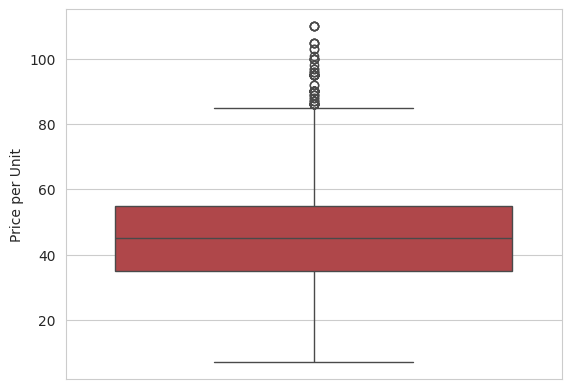

In [ ]:
sns.boxplot(y = 'Price per Unit', data = data)
plt.show()

#### - `Some people may think that the column has outliers, but the values are correct for the types of sales`

### Discover ` Units Sold` column

In [ ]:
data['Units Sold'].unique()[-50:]

array(['1,250', '1,220', '1,200', '1,150', '1,125', '1,075', '975', '925',
       '900', '875', '650', '600', '1,100', '1,070', '1,050', '1,045',
       '1,025', '1,020', '1,000', '950', '945', '920', '870', '850',
       '825', '820', '800', '795', '775', '770', '745', '725', '720',
       '695', '675', '670', '645', '625', '620', '595', '570', '550',
       '545', '525', '520', '500', '495', '470', '445', '395'],
      dtype=object)

In [ ]:
# replace comma with empty string

def replace_comma(Unit):
    return Unit.replace(',', '')

data['Units Sold'] = data['Units Sold'].apply(replace_comma)

In [ ]:
# check comma removed or not

data['Units Sold'].unique()[-50:]

array(['1250', '1220', '1200', '1150', '1125', '1075', '975', '925',
       '900', '875', '650', '600', '1100', '1070', '1050', '1045', '1025',
       '1020', '1000', '950', '945', '920', '870', '850', '825', '820',
       '800', '795', '775', '770', '745', '725', '720', '695', '675',
       '670', '645', '625', '620', '595', '570', '550', '545', '525',
       '520', '500', '495', '470', '445', '395'], dtype=object)

In [ ]:
# convert data type to integer

data['Units Sold'] = data['Units Sold'].astype('int')

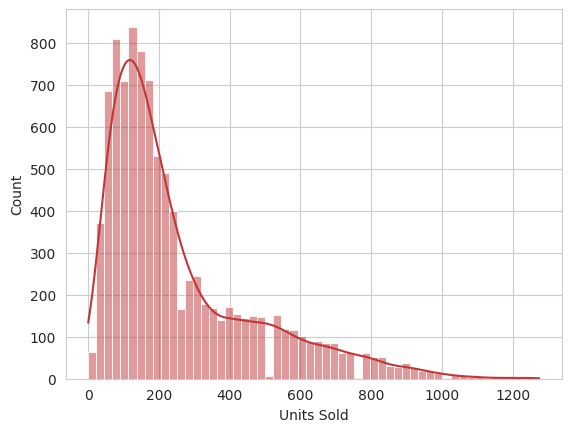

In [ ]:
sns.histplot(data = data, x = "Units Sold", kde=True)
plt.show()

In [ ]:
# show rows contain zero in Units Sold column

data[data["Units Sold"] == 0]

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
6529,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,35.0,0,0,$0,Outlet,June,2021,5,Summer
6530,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,30.0,0,0,$0,Outlet,June,2021,11,Summer
6531,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,33.0,0,0,$0,Online,June,2021,5,Summer
6532,Foot Locker,Midwest,Nebraska,Omaha,Women's Athletic Footwear,27.0,0,0,$0,Online,June,2021,11,Summer


### ⚠️ `Sales may have been returned by customer and money was refunded to him `

### 💡 `I decided to drop them`

In [ ]:
# drop rows contain zero

data = data[data['Units Sold'] != 0]


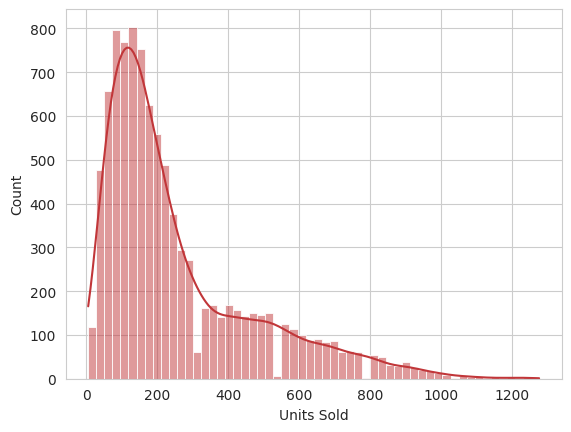

In [ ]:
# visualized Units Sold column after fix inconsistent values

sns.histplot(x = "Units Sold", data = data, kde = True)
plt.show()

### Discover ` Total Sales` column

In [ ]:
data['Total Sales'].unique()

array(['2,245', '1,679', '7,000', ..., '9,900', '11,700', '10,725'],
      dtype=object)

In [ ]:
# replace comma with empty string

data['Total Sales'] = data['Total Sales'].apply(replace_comma) # replace_comma function i created it above

In [ ]:
# convert data type to numeric

data['Total Sales'] = pd.to_numeric(data['Total Sales'], errors = 'coerce', downcast = 'float')

In [ ]:
data.sample(3)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
9388,Foot Locker,Midwest,North Dakota,Fargo,Women's Street Footwear,50.0,250,12500.0,"$3,750",In-store,December,2021,8,Winter
5284,West Gear,West,Utah,Salt Lake City,Women's Athletic Footwear,23.0,73,168.0,$89,Online,March,2021,10,Spring
3504,Amazon,Northeast,Vermont,Burlington,Women's Apparel,61.0,125,763.0,$397,Online,July,2021,10,Summer


#### ⚠️ From above some values in "Total Sales" is incorrect  And so it some value in "Operating Profit" column in same row is incorrect

#### 💡`I will to try fix thes`

In [ ]:
# create boll column Correct total column

# 1- Assign column values with total sales column values
data['Correct total'] = data['Total Sales']

# 2- Compare values with correct values
data['Correct total'] = data['Correct total'] == (data['Price per Unit'] * data['Units Sold'])

### Discover `Operating Profit ` column

In [ ]:
data['Operating Profit'].unique()

array(['$1,257 ', '$806 ', '$3,150 ', ..., '$4,290 ', '$7,394 ',
       '$2,925 '], dtype=object)

In [ ]:
# remone $

data['Operating Profit'] = data['Operating Profit'].apply(removeDollarSign) # removeDollarSign function i created it above
data['Operating Profit']

0       1,257 
1         806 
2       3,150 
3       3,881 
4       3,206 
         ...  
9636    2,438 
9637    2,438 
9638    2,813 
9639    2,925 
9640    2,925 
Name: Operating Profit, Length: 9635, dtype: object

In [ ]:
# replace comma with empty string

data['Operating Profit'] = data['Operating Profit'].apply(replace_comma) # replace_comma function i created it above
data['Operating Profit']

0       1257 
1        806 
2       3150 
3       3881 
4       3206 
        ...  
9636    2438 
9637    2438 
9638    2813 
9639    2925 
9640    2925 
Name: Operating Profit, Length: 9635, dtype: object

In [ ]:
# convert data type to numeric

data['Operating Profit'] = pd.to_numeric(data['Operating Profit'], errors = 'coerce', downcast = 'float')

### 💡 `Create "profit percentage" column`

In [ ]:
# create column

data['profit_percentage'] = (data['Operating Profit'] / data['Total Sales']) * 100

In [ ]:
# round values of column

data["profit_percentage"] = data['profit_percentage'].astype('float').round()

### Correct `Total Sales` column values

In [ ]:
# Correct values

data['Total Sales'] = data['Price per Unit'] * data['Units Sold']

In [ ]:
# calculate profit based on profit percentage column

data['Operating Profit'] = data['Total Sales'] * (data['profit_percentage'] / 100)

### Discover `Sales Method` column

In [ ]:
data['Sales Method'].unique()

array(['Online', 'Outlet', 'In-store'], dtype=object)

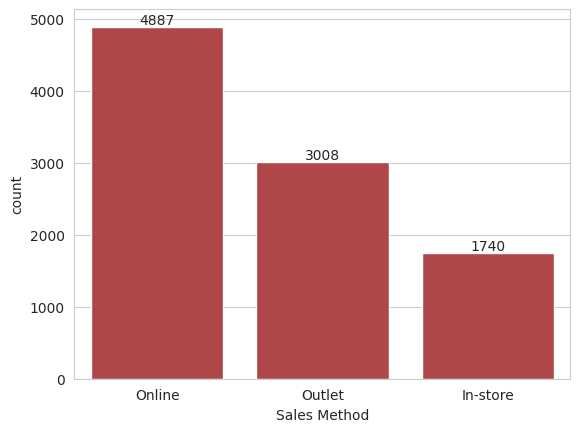

In [ ]:
graph = sns.countplot(x = "Sales Method", data = data, order = data['Sales Method'].value_counts().index)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

## **Summary**

- Drop rows have missing value in `Price per units` columns, Because This values are somewhat very small.
- In `Invoice Date column` i extract some values such as `year`, `month`,`day` and create `season` column based on month column and i drop it.
- In `Product`, There were duplicate values due to a spelling error and fixed this.
- In `Price per Unit`, i remove Dollar Sign and convert data type to numeric.
- In ` Units Sold`, replace comma with empty string and  convert data type to integer.
    - ⚠️ During discover this column I found zero values `Sales may have been returned by customer and money was refunded to him `
    - 💡 `I decided to drop them`
    
- In `Total Sales` replace comma with empty string and convert data type to numeric.
    - ⚠️ During discover this column some values in "Total Sales" is incorrect  And so it some value in "Operating Profit" column in same row is incorrect
    - 💡 I fixed this by using some `calculations and adding some columns to help me fix this`.
- In `Total Sales` i remove Dollar Sign,replace comma with empty string and convert data type to numeric.

In [ ]:
# Drop some columns that we don't need

data.drop(columns = ['Correct total', 'profit_percentage'], inplace = True)
data.sample(3)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Month,Year,Day,Season
1786,Foot Locker,Northeast,Pennsylvania,Philadelphia,Women's Street Footwear,40.0,175,7000.0,2800.00,Outlet,November,2021,5,Autumn
2669,West Gear,West,Utah,Salt Lake City,Men's Street Footwear,29.0,149,4321.0,2160.50,Online,November,2021,11,Autumn
3165,Sports Direct,West,Idaho,Boise,Men's Apparel,52.0,133,6916.0,3181.36,Online,August,2021,8,Summer


## **Exploratory Data Analysis**

In [ ]:
# Calculate Correlation
corr = data[['Price per Unit',	'Units Sold',	'Total Sales',	'Operating Profit']].corr()

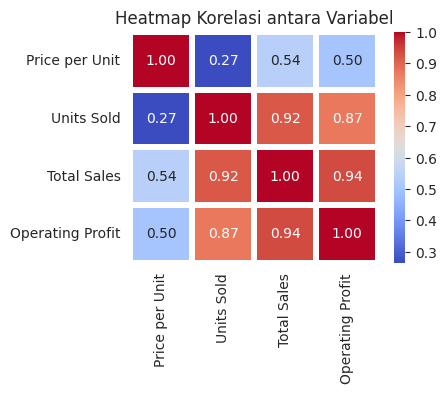

In [ ]:
# Create Variable
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap="coolwarm",
            fmt=".2f", linewidths=4)
plt.title("Heatmap Korelasi antara Variabel")
plt.show()

In [ ]:
# create groupData function to group each column with Total Sales and Operating Profit

def groupData(columnName):
    return data.groupby(columnName).agg({'Total Sales' : sum, 'Operating Profit' : 'sum'})

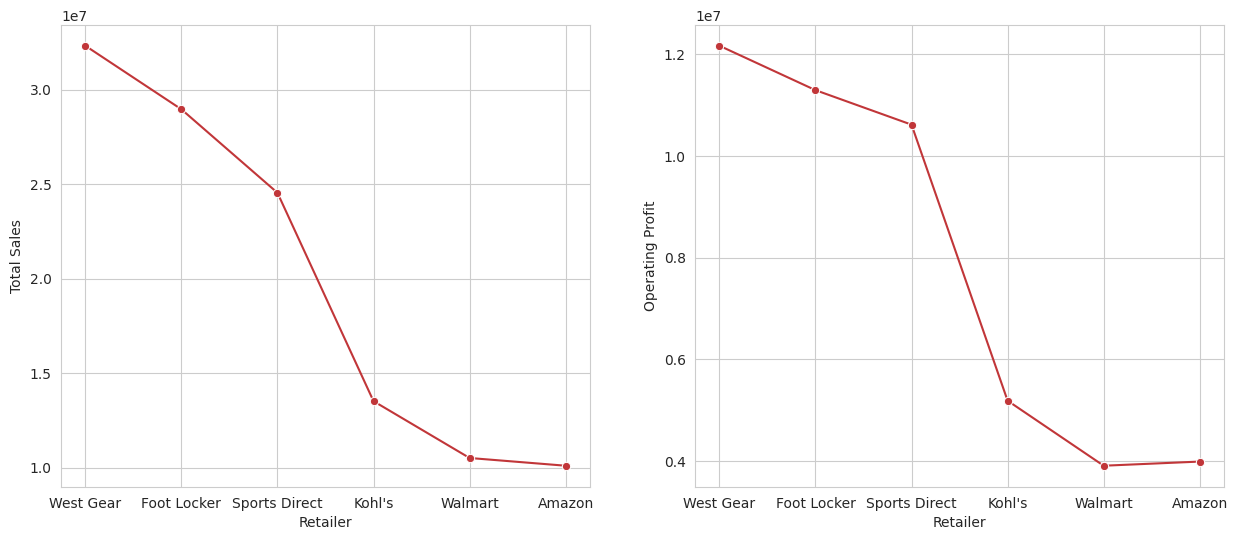

In [ ]:
# What is total sales, Operating Profit in each Retailer ?

RetailerSales = groupData('Retailer').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = RetailerSales.index, y = "Total Sales", data = RetailerSales, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = RetailerSales.index, y = "Operating Profit", data = RetailerSales, marker='o')

plt.show()

-  `West Gear` and `Foot locker` emerge as the top retailers, capturing 27% and 24% of sales, respectively.

In [ ]:
# Show Total Sales and Operating Profit

RetailerSales['sales percentage'] = (RetailerSales['Total Sales'] / RetailerSales['Total Sales'].sum()) * 100
RetailerSales

,Total Sales,Operating Profit,sales percentage
Retailer,,,
West Gear,32317808.0,12168804.30,26.948288
Foot Locker,28953945.0,11294510.32,24.143322
Sports Direct,24537997.0,10615105.88,20.461072
Kohl's,13512453.0,5182266.02,11.267394
Walmart,10506085.0,3902748.70,8.760526
Amazon,10096987.0,3984437.15,8.419399


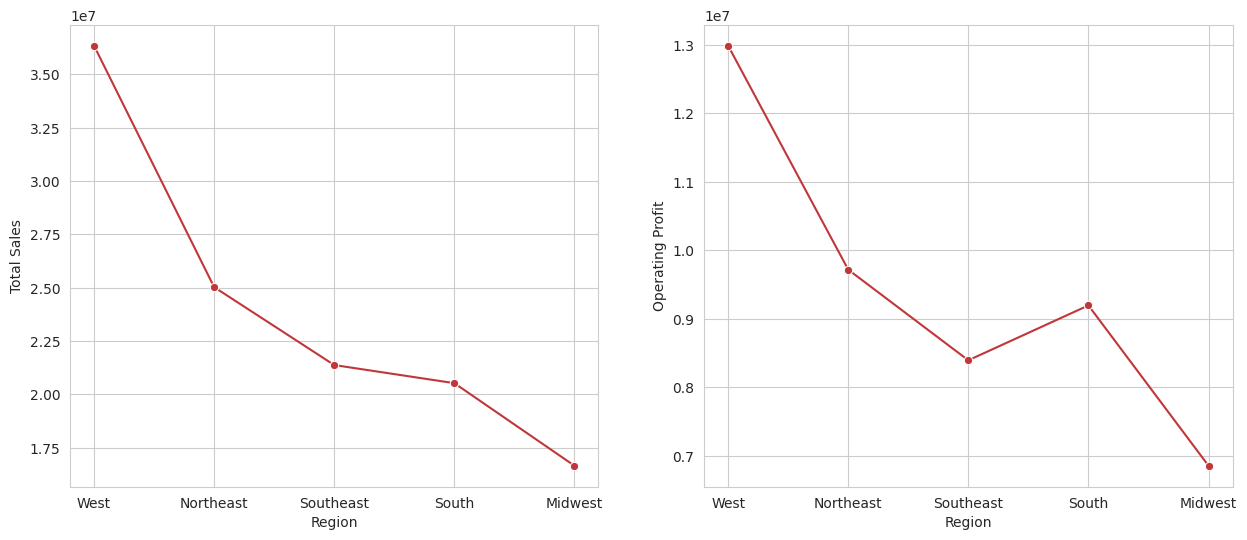

In [ ]:
# What is total sales, Operating Profit in each Region ?


RegionSales = groupData('Region').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = RegionSales.index, y = "Total Sales", data = RegionSales, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = RegionSales.index, y = "Operating Profit", data = RegionSales, marker='o')

plt.show()

- `West` and `Northeast` emerge as the top Region, capture 30% and 21% of sales  respectively.

In [ ]:
# Show Total Sales and Operating Profit

RegionSales['sales percentage'] = ((RegionSales['Total Sales'] / RegionSales['Total Sales'].sum()) * 100).round()
RegionSales

,Total Sales,Operating Profit,sales percentage
Region,,,
West,36344407.0,12989521.55,30.0
Northeast,25027267.0,9717495.29,21.0
Southeast,21374436.0,8393057.36,18.0
South,20524731.0,9195085.80,17.0
Midwest,16654434.0,6852712.37,14.0


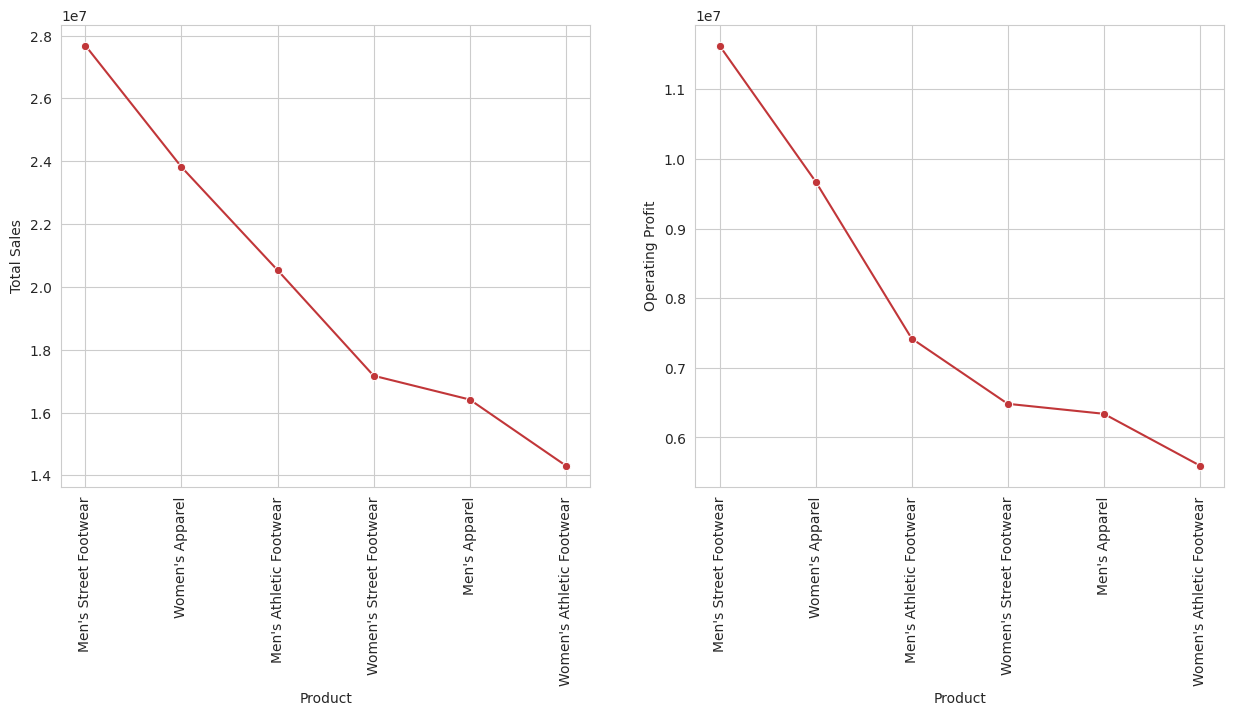

In [ ]:
# What is total sales, Operating Profit in each Product ?


ProductSales = groupData('Product').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = ProductSales.index, y = "Total Sales", data = ProductSales, marker = "o")
plt.xticks(rotation = 90)


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = ProductSales.index, y = "Operating Profit", data = ProductSales, marker='o')
plt.xticks(rotation = 90)

plt.show()

- Top product categories such as `Men’s Street Footwear`, `Women’s Apparel`, and `Men’s Athletic Footwear`, which collectively account for 60% of total sales

In [ ]:
# Show Total Sales and Operating Profit

ProductSales['sales percentage'] = ((ProductSales['Total Sales'] / ProductSales['Total Sales'].sum()) * 100).round()
ProductSales

,Total Sales,Operating Profit,sales percentage
Product,,,
Men's Street Footwear,27680769.0,11629045.62,23.0
Women's Apparel,23814985.0,9676820.56,20.0
Men's Athletic Footwear,20532180.0,7421729.32,17.0
Women's Street Footwear,17171938.0,6483647.11,14.0
Men's Apparel,16413882.0,6340422.37,14.0
Women's Athletic Footwear,14311521.0,5596207.39,12.0


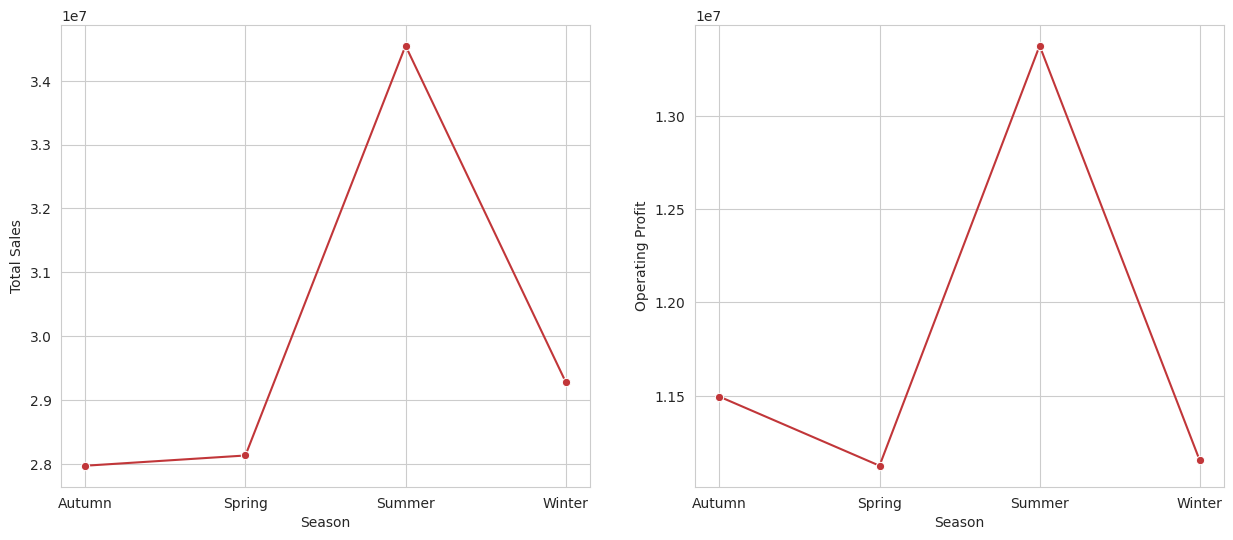

In [ ]:
# What is total sales, Operating Profit in each Season ?

SeasonSales = groupData('Season').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = SeasonSales.index, y = "Total Sales", data = SeasonSales, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = SeasonSales.index, y = "Operating Profit", data = SeasonSales, marker='o')

plt.show()

- Sales increase in the `summer` and `winter` seasons, which represent 29 % and 24%  of sales respectively.It may be due to school season or recreational breaks on the beach

In [ ]:
# Show Total Sales and Operating Profit

SeasonSales['sales percentage'] = ((SeasonSales['Total Sales'] / SeasonSales['Total Sales'].sum()) * 100).round()
SeasonSales

,Total Sales,Operating Profit,sales percentage
Season,,,
Summer,34548167.0,13378861.05,29.0
Winter,29281202.0,11151361.78,24.0
Spring,28128124.0,11123263.49,23.0
Autumn,27967782.0,11494386.05,23.0


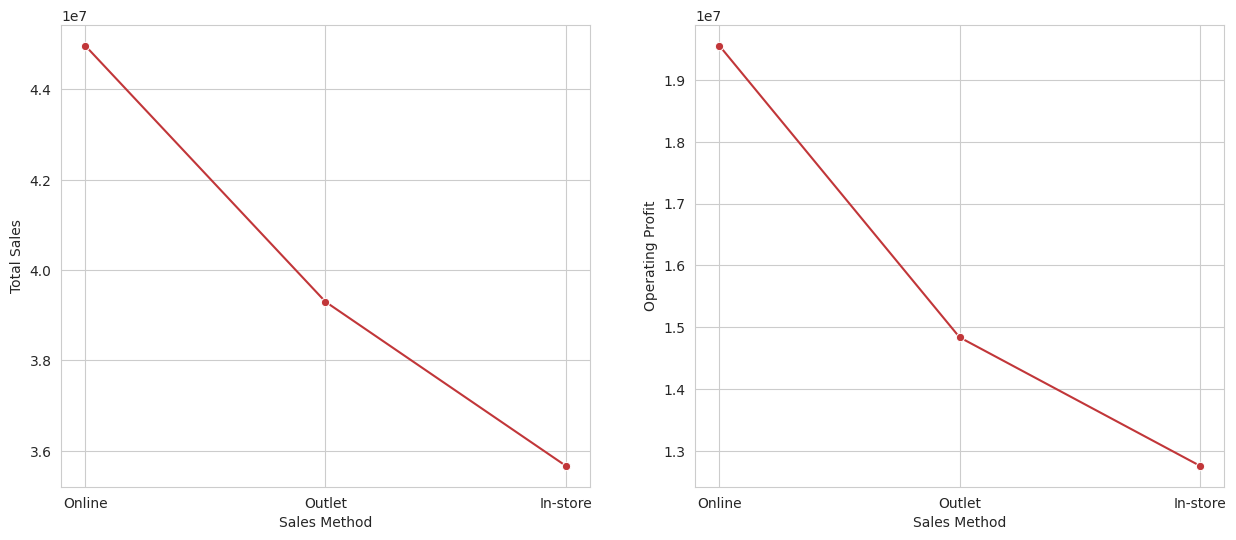

In [ ]:
# What is total sales, Operating Profit in each Sales Method ?

SalesMethod = groupData('Sales Method').sort_values(by = 'Total Sales', ascending = False)

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = SalesMethod.index, y = "Total Sales", data = SalesMethod, marker = "o")


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = SalesMethod.index, y = "Operating Profit", data = SalesMethod, marker='o')

plt.show()

-  The `online sales method` ranked first with a percentage 37%, followed by `Outlet Sales method` with a percentage 33%

In [ ]:
# Show Total Sales and Operating Profit

SalesMethod['sales percentage'] = ((SalesMethod['Total Sales'] / SalesMethod['Total Sales'].sum()) * 100).round()
SalesMethod

,Total Sales,Operating Profit,sales percentage
Sales Method,,,
Online,44965657.0,19552559.15,37.0
Outlet,39295243.0,14836184.47,33.0
In-store,35664375.0,12759128.75,30.0


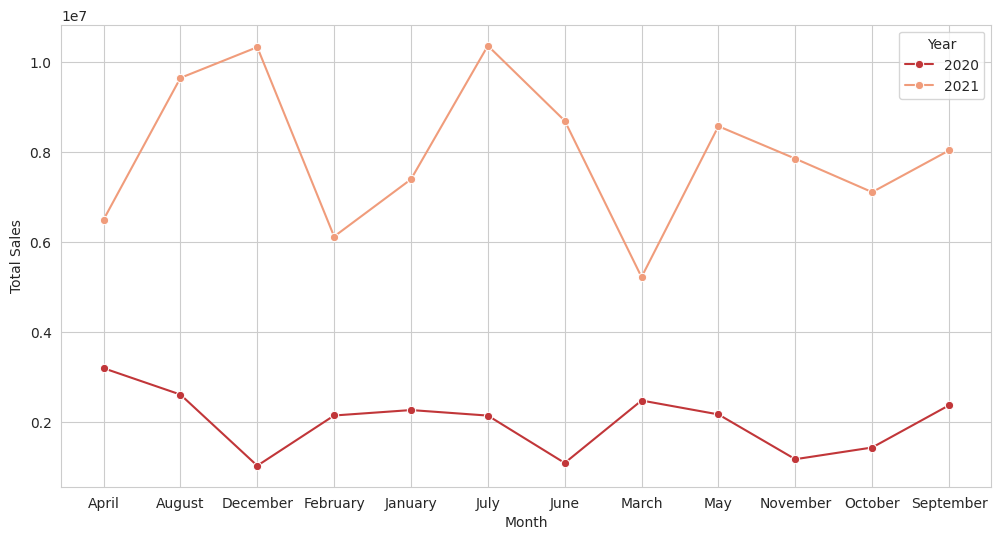

In [ ]:
# What is total sales of each year ?

sales_by_month = data.groupby(['Year','Month'])['Total Sales'].sum().reset_index()

# create plot
plt.figure(figsize = (12,6))
sns.lineplot(x = "Month", y = "Total Sales", hue = "Year", data = sales_by_month, marker='o')

plt.show()

- In `2021`, sales were much higher than in `2020`, and the main reason for this was Covid-19.

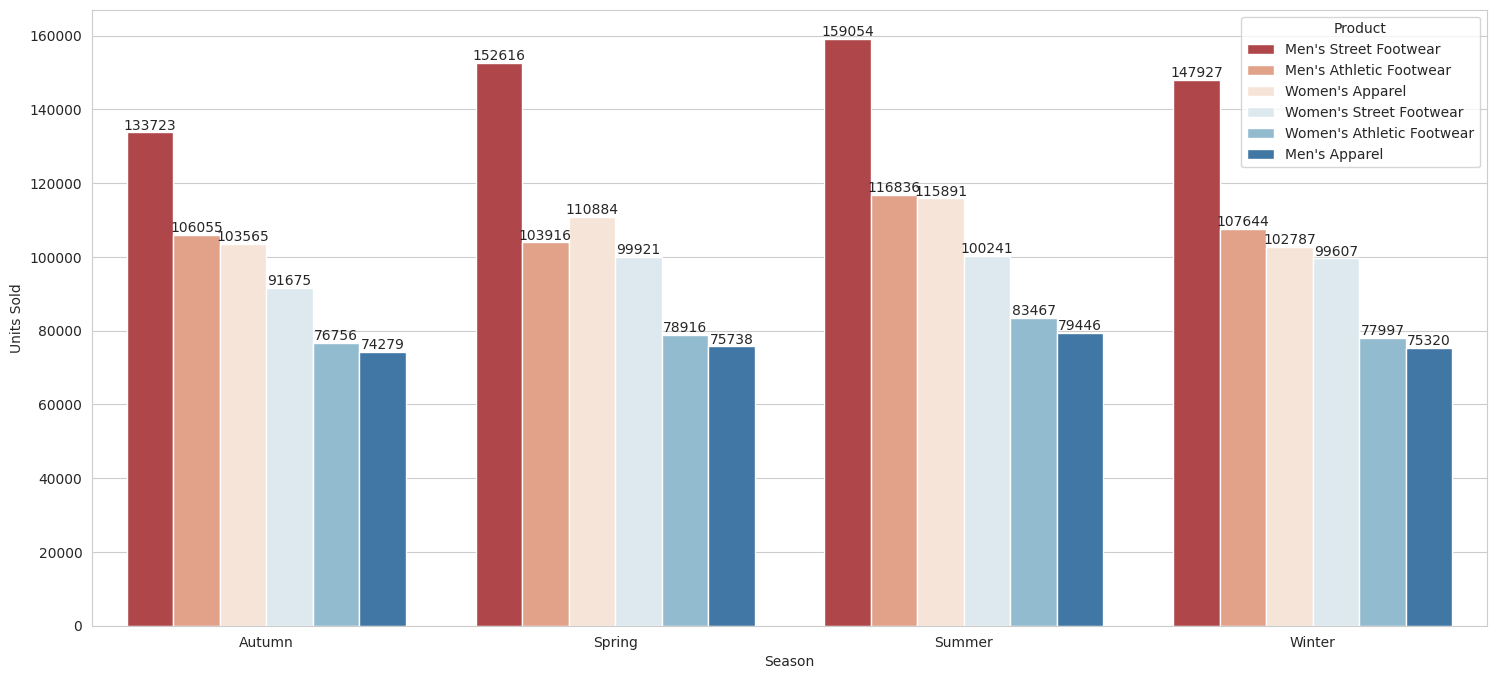

In [ ]:
# Does the sale of a particular product increase or decrease during the seasons?

seasonSales = data.groupby(['Season', 'Product'])['Units Sold'].sum().reset_index().sort_values(
                                                                                        by = 'Units Sold', ascending = False)

# create plot
plt.figure(figsize = (18,8))
graph = sns.barplot(x = "Season", y = "Units Sold", hue = 'Product', data = seasonSales)
for container in graph.containers:
    graph.bar_label(container)

plt.show()

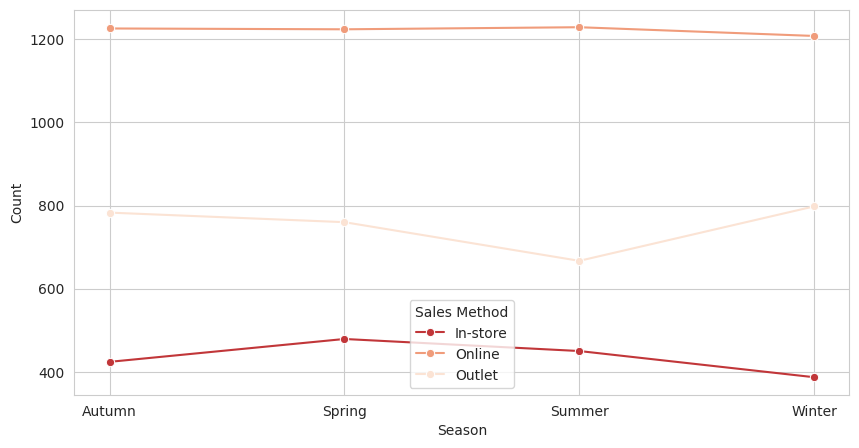

In [ ]:
# Does the Sales Method increase or decrease during seasons?

seasonSalesMethod = data.groupby(['Season', 'Sales Method']).agg(Count = ('Sales Method', 'count'))

# create plot
plt.figure(figsize = (10,5))
sns.lineplot(x = "Season", y = "Count", hue = 'Sales Method', data = seasonSalesMethod, marker='o')

plt.show()

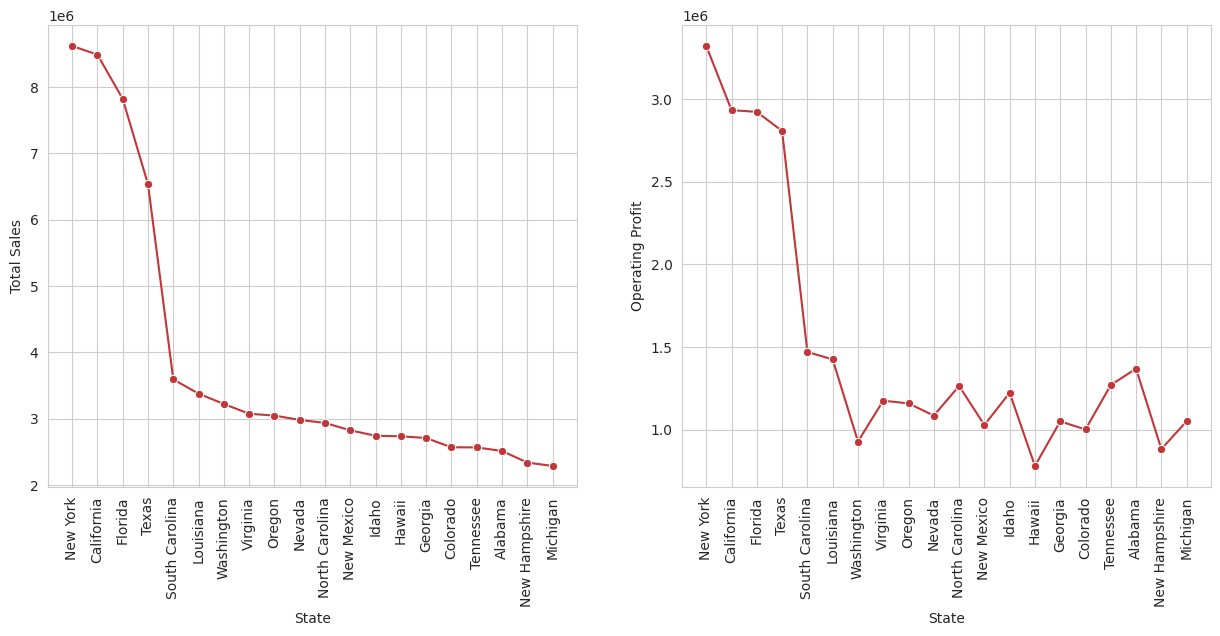

In [ ]:
# What is the distribution of sales by top 20 state and city?

stateSales = groupData('State').sort_values(by = 'Total Sales', ascending = False)[:20]

# set size to plot
plt.figure(figsize = (15,6))

# create plot of Total Sales
plt.subplot(1, 2, 1)
sns.lineplot(x = stateSales.index, y = "Total Sales", data = stateSales, marker = "o")
plt.xticks(rotation = 90)


# Create plot of Operating Profit
plt.subplot(1, 2, 2)
sns.lineplot(x = stateSales.index, y = "Operating Profit", data = stateSales, marker='o')
plt.xticks(rotation = 90)

plt.show()

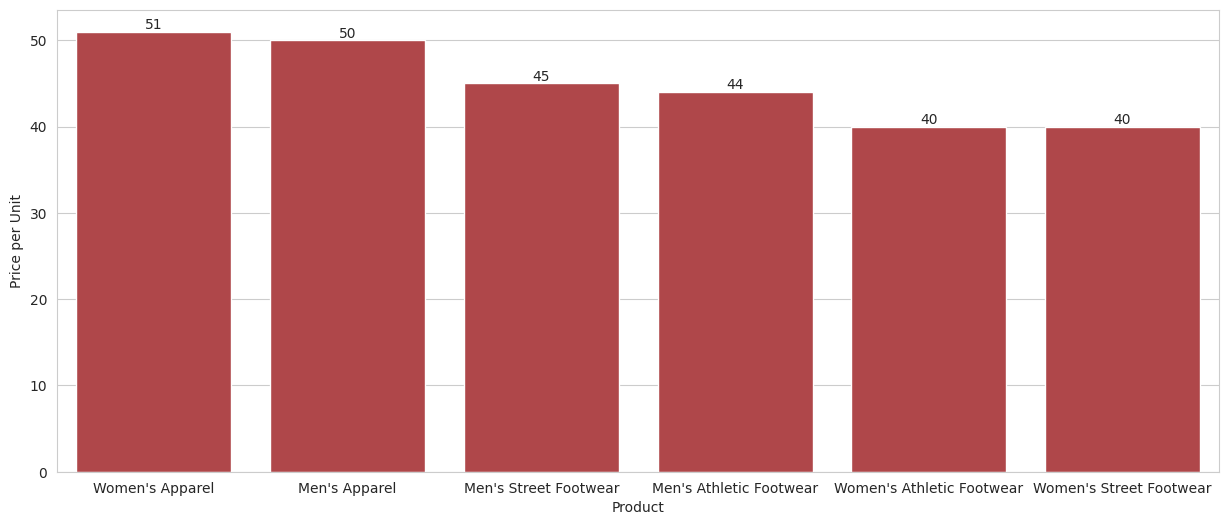

In [ ]:
# What is the average price of products per unit ?

productsPerUnit = data.groupby('Product')['Price per Unit'].median().reset_index().sort_values(
                                                                                    by = 'Price per Unit', ascending = False)

plt.figure(figsize = (15,6))
graph = sns.barplot(x = 'Product', y = 'Price per Unit', data = productsPerUnit)

for container in graph.containers:
    graph.bar_label(container)

plt.show()

In [ ]:
data.to_csv('todashboard.csv', index=False)

## **Choose Variable to Used**

In [ ]:
data.drop(['Month', 'Year', 'Day'], axis=1, inplace=True)


In [ ]:
data.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Season
0,Walmart,Southeast,Florida,Orlando,Women's Apparel,103.0,218,22454.0,12574.24,Online,Summer
1,West Gear,South,Louisiana,New Orleans,Women's Apparel,103.0,163,16789.0,8058.72,Online,Summer
2,Sports Direct,South,Alabama,Birmingham,Men's Street Footwear,10.0,700,7000.0,3150.00,Outlet,Summer
3,Sports Direct,South,Alabama,Birmingham,Women's Street Footwear,15.0,575,8625.0,3881.25,Outlet,Summer
4,Sports Direct,South,Alabama,Birmingham,Women's Street Footwear,15.0,475,7125.0,3206.25,Outlet,Summer


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an encoder for each column
encoders = {}
for col in ['Sales Method', 'Season', 'Retailer', 'Region', 'State', 'City', 'Product']:
  encoders[col] = LabelEncoder()

# Encode each column
for col in encoders.keys():
  data[col] = encoders[col].fit_transform(data[col])


In [ ]:
data.describe()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Season
count,9635.000000,9635.000000,9635.000000,9635.000000,9635.000000,9635.000000,9635.000000,9635.000000,9635.000000,9635.000000,9635.000000
mean,2.609237,2.001142,24.224909,25.763570,2.499533,45.217955,256.799273,12446.837052,4893.396198,1.131604,1.487701
std,1.726883,1.470878,14.744589,14.886804,1.707265,14.705179,214.020187,12703.110069,4864.183734,0.689577,1.118813
min,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,6.000000,160.000000,80.000000,0.000000,0.000000
25%,1.000000,1.000000,10.000000,12.000000,1.000000,35.000000,106.000000,4068.000000,1753.920000,1.000000,0.000000
50%,3.000000,2.000000,25.000000,26.000000,2.000000,45.000000,176.000000,7802.000000,3261.960000,1.000000,1.000000
75%,4.000000,4.000000,37.000000,39.000000,4.000000,55.000000,350.000000,15780.000000,6188.790000,2.000000,2.000000
max,5.000000,4.000000,49.000000,51.000000,5.000000,110.000000,1275.000000,82500.000000,39000.000000,2.000000,3.000000


In [ ]:
high_demand = (data["Units Sold"] >= 600) & (data["Units Sold"] <= 1275)
moderate_demand = (data["Units Sold"] >= 200) & (data["Units Sold"] <= 599)
low_demand = ~ (high_demand | moderate_demand)  # Logical negation for remaining entries

# Create the new 'DemandCategory' column using np.where
demand_categories = np.where(high_demand, 2, np.where(moderate_demand, 1, 0))

# Add the new column to the DataFrame
data["Target"] = demand_categories

data

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Season,Target
0,4,3,8,39,3,103.0,218,22454.0,12574.24,1,2,1
1,5,2,17,34,3,103.0,163,16789.0,8058.72,1,2,0
2,3,2,0,6,2,10.0,700,7000.0,3150.00,2,2,2
3,3,2,0,6,5,15.0,575,8625.0,3881.25,2,2,1
4,3,2,0,6,5,15.0,475,7125.0,3206.25,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,0,1,18,42,0,65.0,150,9750.0,2437.50,2,0,0
9637,0,4,1,2,4,65.0,150,9750.0,2437.50,2,0,0
9638,0,4,1,2,0,75.0,150,11250.0,2812.50,2,0,0
9639,5,0,13,23,0,65.0,150,9750.0,2925.00,0,1,0


Produk diminati (High Demand): 600 - 1275 (Top 10% of products) == 2
Produk berpotensi (Moderate Demand): 200 - 599 (Middle 50% of products) == 1
Produk tidak diminati (Low Demand): 6 - 199 (Bottom 40% of products) == 0

In [ ]:
results = data['Target'].value_counts()
total_data = results.sum()
percentages = (results / total_data) * 100

results_with_percentages = pd.concat([results, percentages], axis=1)
results_with_percentages.columns = ['Total Data', 'Percentage']
results_with_percentages

,Total Data,Percentage
Target,,
0,5227,54.250130
1,3454,35.848469
2,954,9.901401


##**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Target',axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7708, 11), (7708,), (1927, 11), (1927,))

##**Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7708, 11), (7708,), (1927, 11), (1927,))

##**Training Machine Learning Models**

In [ ]:
from sklearn.linear_model import LogisticRegression # still classificication
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
lr = LogisticRegression()
models = [dt,svc,knn,nb,lr]

preds = [[],[],[],[],[]]

for i,model in enumerate(models):
    model.fit(X_train,y_train)
    preds[i] = model.predict(X_test)
preds


[array([1, 2, 0, ..., 0, 1, 0]),
 array([1, 2, 0, ..., 0, 1, 0]),
 array([1, 2, 0, ..., 0, 1, 0]),
 array([1, 2, 0, ..., 0, 1, 0]),
 array([1, 2, 0, ..., 0, 1, 0])]

##**Evaluating the Models**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

Model:  DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1056
           1       1.00      1.00      1.00       688
           2       1.00      1.00      1.00       183

    accuracy                           1.00      1927
   macro avg       1.00      1.00      1.00      1927
weighted avg       1.00      1.00      1.00      1927



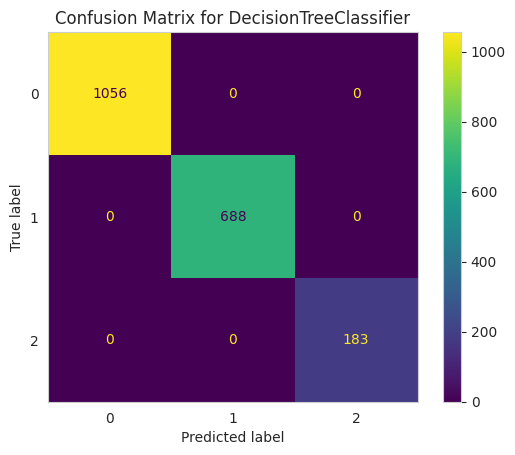

Model:  SVC
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1056
           1       0.96      0.93      0.94       688
           2       0.96      0.93      0.94       183

    accuracy                           0.96      1927
   macro avg       0.96      0.95      0.95      1927
weighted avg       0.96      0.96      0.96      1927



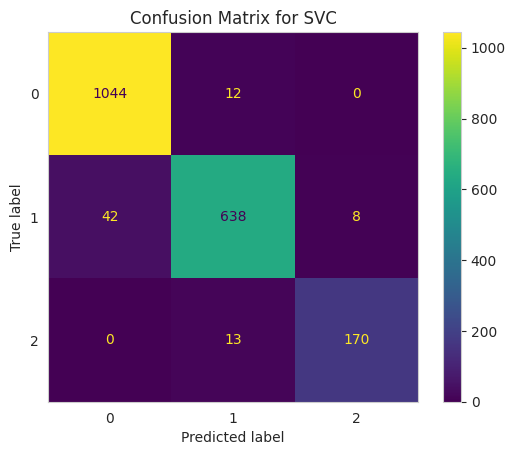

Model:  KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1056
           1       0.83      0.81      0.82       688
           2       0.89      0.80      0.84       183

    accuracy                           0.87      1927
   macro avg       0.87      0.84      0.86      1927
weighted avg       0.87      0.87      0.87      1927



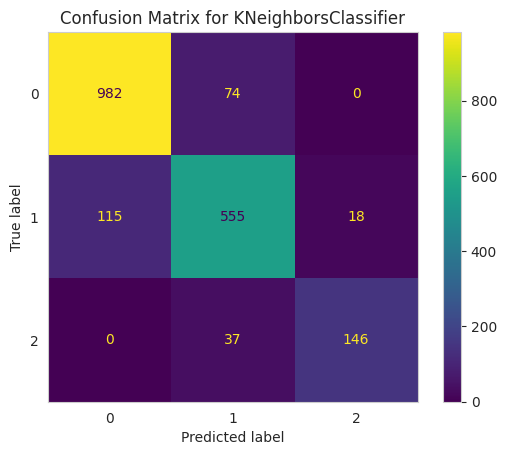

Model:  GaussianNB
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1056
           1       0.88      0.82      0.85       688
           2       0.80      0.90      0.85       183

    accuracy                           0.90      1927
   macro avg       0.87      0.89      0.88      1927
weighted avg       0.90      0.90      0.90      1927



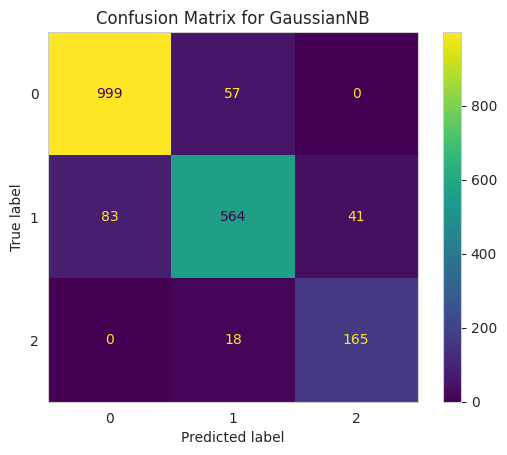

Model:  LogisticRegression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1056
           1       0.97      0.92      0.94       688
           2       0.98      0.91      0.94       183

    accuracy                           0.96      1927
   macro avg       0.97      0.94      0.95      1927
weighted avg       0.96      0.96      0.96      1927



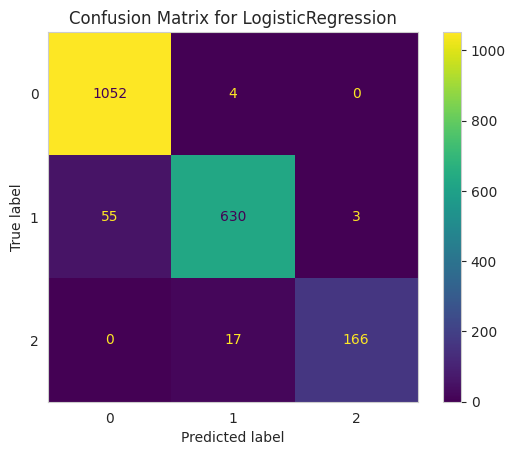

In [ ]:
def evaluate_model(predictions,name):
    print('Model: ',name)
    print(classification_report(y_test,predictions))
    cm = confusion_matrix(y_test,predictions)
    disp   = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.grid(False)  # Menonaktifkan garis grid
    na = 'Conf'
    plt.title('Confusion Matrix for '+ name)
    plt.show()  # Menampilkan plot

#models = [dt,svc,knn,nb,lr]
for i,y_preds in enumerate(preds):
    evaluate_model(predictions = y_preds, name = str(models[i]).split('()')[0])


Based on the results you provided, the best performing model for classification task is a tie between the LogisticRegression and SVC (Support Vector Classifier) models.

Here's a breakdown of the models' performance:

LogisticRegression and SVC: Both models achieve an accuracy of 0.96, which is the highest among the five models. They also have high precision, recall, and F1-score values for three classes (0, 1, 2).

DecisionTreeClassifier: This model achieves perfect accuracy (1.0) but this might be due to overfitting. It's important to evaluate the model on unseen data to confirm its generalizability.

KNeighborsClassifier and GaussianNB: These models have slightly lower accuracy (0.87 and 0.90 respectively) compared to the top performers.

## Feature Importance Logistic Regression

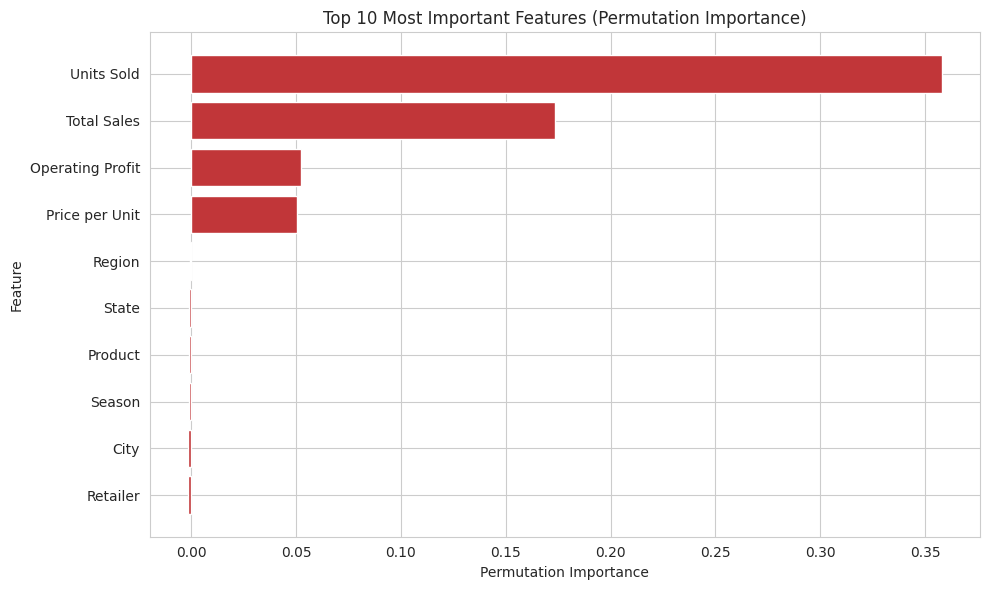

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Assuming you have X_test, y_test, and the trained svc model

# Calculate permutation importance
feature_importances = permutation_importance(lr, X_test, y_test)
importances = feature_importances.importances_mean

# Sort feature importances in descending order
sorted_idx = importances.argsort()[::-1]

# Get top 10 features and their importance scores
top_10_features = data.columns[sorted_idx[:10]]
top_10_importances = importances[sorted_idx[:10]]

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importances)
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features (Permutation Importance)")
plt.gca().invert_yaxis()  # Invert y-axis to display most important at top
plt.tight_layout()
plt.show()




## **Improving Our Best Model (Hyperparameter Tuning)**

##Hyperparameter tuning SVC

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# use GridSearchCV to obtain best parameters
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svm = SVC()
clf = GridSearchCV(svm,param_grid)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
clf.best_estimator_,clf.best_score_,clf.best_params_

(SVC(C=100, gamma=0.001),
 0.9375969922002237,
 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'})

In [ ]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.050519,0.452150,0.645566,0.207118,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.540856,0.541505,0.540856,0.541207,0.541207,0.541126,0.000246,4
1,1.822009,0.134471,0.560859,0.177934,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.540856,0.541505,0.540856,0.541207,0.541207,0.541126,0.000246,4
2,1.454115,0.323367,0.498560,0.158869,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.806744,0.791180,0.822309,0.800779,0.809215,0.806045,0.010235,3
3,2.239640,0.685382,0.571918,0.178043,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.540856,0.541505,0.540856,0.541207,0.541207,0.541126,0.000246,4
4,0.723807,0.027537,0.284594,0.083380,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.939040,0.930610,0.945525,0.935107,0.937703,0.937597,0.004898,1
5,1.537494,0.357589,0.487380,0.141461,100,0.0001,rbf,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",0.806744,0.791829,0.822309,0.800779,0.809215,0.806175,0.010048,2


This particular iteration of the hyperparameter tuning process for the SVC model resulted in a cross-validation score of 0.9375 when using the hyperparameter configuration C=100, gamma=0.001, and kernel='rbf'. This suggests that this combination of hyperparameters yielded a model with relatively good performance on the validation dataset.

In [ ]:
# Obtained the best SVM SVC with Grid Search
best_param_svm = clf.best_estimator_
best_param_svm.fit(X_train,y_train)

SVC(C=100, gamma=0.001)

##Hyperparameter tuning Logistic Regression

In [ ]:
lr

LogisticRegression()

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')

In [ ]:
print (f'Accuracy - : {best_clf.score(X,y):.3f}')

Accuracy - : 0.099


## predict with New Data Logistic

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TestAdidas - testing2.csv')
test

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Season,Target
0,4,3,8,39,3,103,308,22454,12574.24,1,2,1
1,5,2,17,34,3,103,253,16789,8058.72,1,2,1
2,3,2,0,6,2,10,790,7000,3150.00,2,2,2
3,3,2,0,6,5,15,665,8625,3881.25,2,2,2
4,3,2,0,6,5,15,565,7125,3206.25,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9630,0,1,18,42,0,65,240,9750,2437.50,2,0,1
9631,0,4,1,2,4,65,240,9750,2437.50,2,0,1
9632,0,4,1,2,0,75,240,11250,2812.50,2,0,1
9633,5,0,13,23,0,65,240,9750,2925.00,0,1,1


In [ ]:
test_features = test.drop('Target',axis=1)
test_labels = test['Target']

test_features = scaler.transform(test_features)

In [ ]:
predictions = best_clf.predict(test_features)
predictions

array([1, 1, 2, ..., 1, 1, 1])

In [ ]:
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2489
           1       0.97      0.85      0.90      5806
           2       0.99      0.89      0.94      1340

    accuracy                           0.89      9635
   macro avg       0.90      0.91      0.90      9635
weighted avg       0.91      0.89      0.89      9635



In [ ]:
cm = confusion_matrix(test_labels,predictions)
cm

array([[2479,    0,   10],
       [ 888, 4918,    0],
       [   0,  149, 1191]])

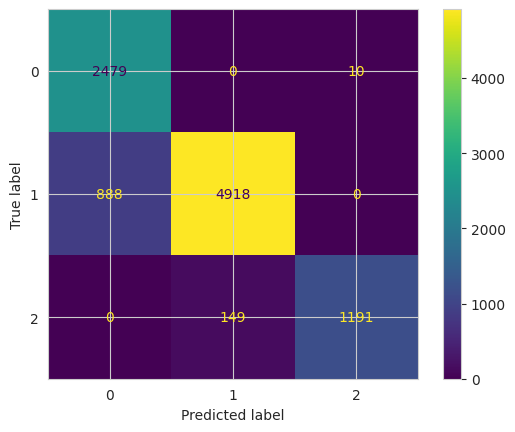

In [ ]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Predict with New Data SVC

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TestAdidas - testing2.csv')
test

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Season,Target
0,4,3,8,39,3,103,308,22454,12574.24,1,2,1
1,5,2,17,34,3,103,253,16789,8058.72,1,2,1
2,3,2,0,6,2,10,790,7000,3150.00,2,2,2
3,3,2,0,6,5,15,665,8625,3881.25,2,2,2
4,3,2,0,6,5,15,565,7125,3206.25,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9630,0,1,18,42,0,65,240,9750,2437.50,2,0,1
9631,0,4,1,2,4,65,240,9750,2437.50,2,0,1
9632,0,4,1,2,0,75,240,11250,2812.50,2,0,1
9633,5,0,13,23,0,65,240,9750,2925.00,0,1,1


In [ ]:
test_features = test.drop('Target',axis=1)
test_labels = test['Target']

test_features = scaler.transform(test_features)

In [ ]:
predictions = best_param_svm.predict(test_features)
predictions

array([1, 1, 2, ..., 0, 0, 0])

## **Evaluate the Best SVM Model's Results**

In [ ]:
print(classification_report(test_labels,predictions))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75      2489
           1       0.94      0.71      0.81      5806
           2       0.99      0.81      0.89      1340

    accuracy                           0.80      9635
   macro avg       0.84      0.84      0.82      9635
weighted avg       0.86      0.80      0.81      9635



In [ ]:
cm = confusion_matrix(test_labels,predictions)
cm

array([[2479,    0,   10],
       [1669, 4134,    3],
       [   0,  259, 1081]])

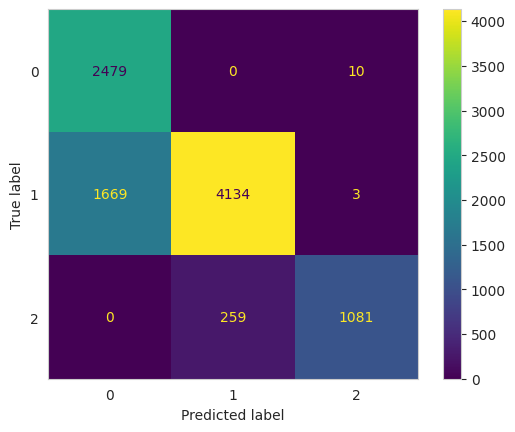

In [ ]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.grid()

In [ ]:
data.to_csv('adidasclass.csv', index=False)